<a href="https://colab.research.google.com/github/bo0tman/ImageProcessing-Degradation-Restoration/blob/master/Image_Processing_Degradation_Restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Basic Components*

### Requirements Installation

*   numpy
*   scipy
*   matplotlib
*   scikit-image


In [13]:
pip install -r /content/requirements.txt

### Loading image



---

Importing Libraries and functions

---



In [14]:
from skimage.io import imread, imread_collection
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np


---

Image result

---


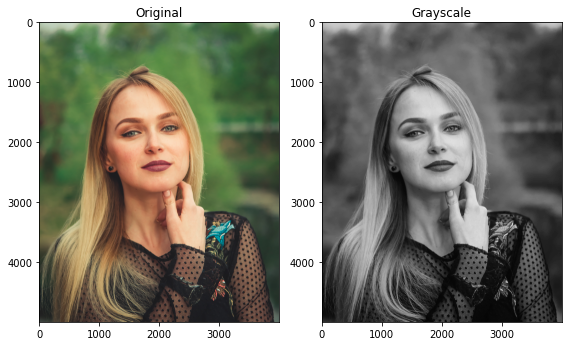

In [34]:
img = imread('/content/drive/My Drive/Colab Notebooks/dataset-for-image-processing/1.jpg');

grayscale_img = rgb2gray(img)

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()

# Left-side
ax[0].imshow(img)    
ax[0].set_title("Original")
# Right-side
ax[1].imshow(grayscale_img, cmap=plt.cm.gray) 
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

##  *Image Degradation*

*   Gaussian Noise (Amplifier Noise)
*   Salt and Pepper Noise
*   Poisson Noise (Short Noise)
*   Speckle Noise





### Applying Guassian Filter or Gaussian blur

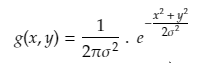



---

Importing Libraries and functions

---



In [16]:
from skimage.util import random_noise


---

Guassain Filter result

---


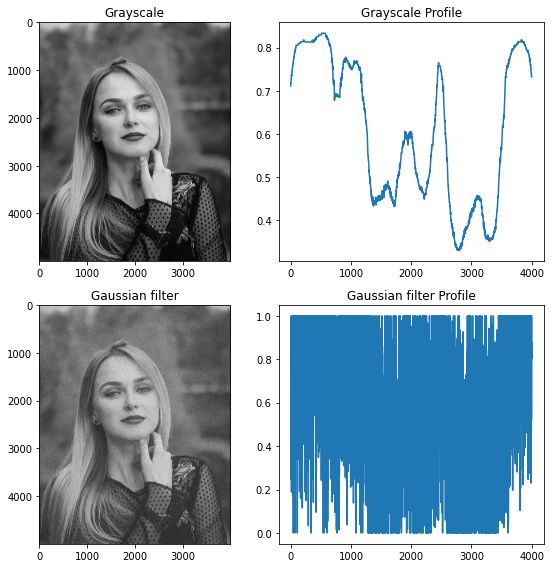

In [75]:
# from scipy.ndimage import gaussian_filter
# img_as_np = np.asarray(grayscale_img)
# gaussian_fltr =gaussian_filter(img_as_np, sigma=12)
gaussian_fltr = random_noise(grayscale_img, mode='gaussian', var=0.1)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()

# Left-side
ax[0].imshow(grayscale_img)   
ax[0].set_title("Grayscale")
# Right-side

ax[1].plot(grayscale_img[0,:])
ax[1].set_title("Grayscale Profile")

ax[2].imshow(gaussian_fltr)   
ax[2].set_title("Gaussian filter")

ax[3].plot(gaussian_fltr[0,:])
ax[3].set_title("Gaussian filter Profile")

fig.tight_layout()
plt.show()


### Applying Salt and Pepper Noise

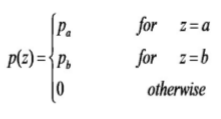

---

Salt and Pepper Noise result

---


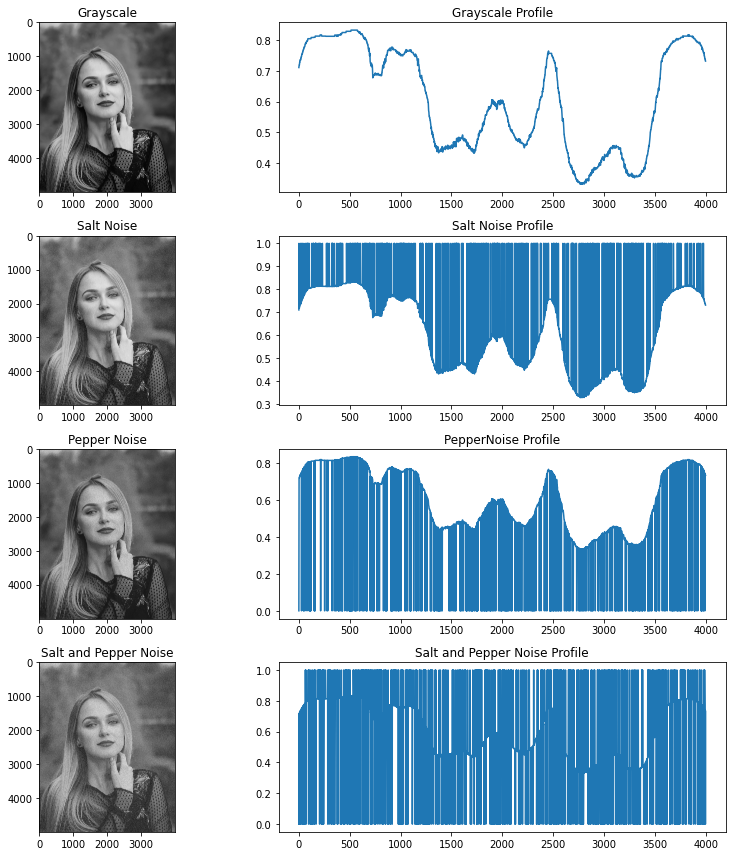

In [18]:
salt_noise = random_noise(grayscale_img, mode='salt', amount=0.1)
pepper_noise = random_noise(grayscale_img, mode='pepper', amount=0.1)
salt_and_pepper_noise = random_noise(grayscale_img, mode='s&p', amount=0.2)

fig, axes = plt.subplots(4, 2, figsize=(12, 12))
plt.gray()
ax = axes.ravel()

ax[0].imshow(grayscale_img)   
ax[0].set_title("Grayscale")

ax[1].plot(grayscale_img[0,:])
ax[1].set_title("Grayscale Profile")

ax[2].imshow(salt_noise)   
ax[2].set_title("Salt Noise")

ax[3].plot(salt_noise[0,:])
ax[3].set_title("Salt Noise Profile")

ax[4].imshow(pepper_noise)   
ax[4].set_title("Pepper Noise")

ax[5].plot(pepper_noise[0,:])
ax[5].set_title("PepperNoise Profile")

ax[6].imshow(salt_and_pepper_noise)   
ax[6].set_title("Salt and Pepper Noise")

ax[7].plot(salt_and_pepper_noise[0,:])
ax[7].set_title("Salt and Pepper Noise Profile")

fig.tight_layout()
plt.show()

### Applying Poisson Noise

In [20]:
from skimage import img_as_float

---

Poisson Noise result

---


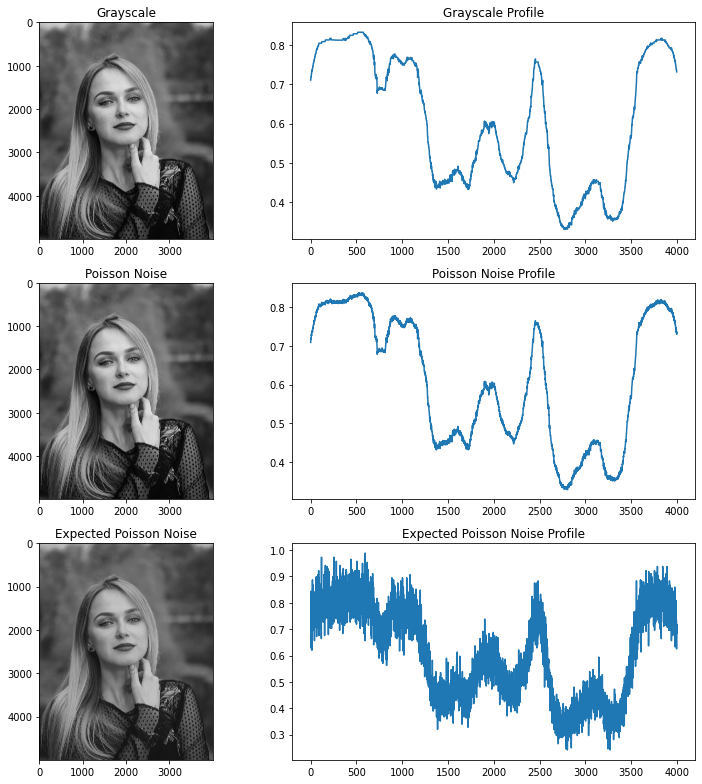

In [21]:
poisson_noise= random_noise(grayscale_img, mode='poisson', clip=True)
expected_poisson_noise = np.random.poisson(img_as_float(grayscale_img) * 256) / 256.

fig, axes = plt.subplots(3, 2, figsize=(11, 11))
ax = axes.ravel()

ax[0].imshow(grayscale_img)   
ax[0].set_title("Grayscale")

ax[1].plot(grayscale_img[0,:])
ax[1].set_title("Grayscale Profile")

ax[2].imshow(poisson_noise)   
ax[2].set_title("Poisson Noise")

ax[3].plot(poisson_noise[0,:])
ax[3].set_title("Poisson Noise Profile")

ax[4].imshow(expected_poisson_noise)
ax[4].set_title("Expected Poisson Noise")

ax[5].plot(expected_poisson_noise[0,:])
ax[5].set_title("Expected Poisson Noise Profile")

fig.tight_layout()
plt.show()

### Applying Speckle Noise

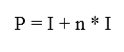

---

Speckle Noise result

---

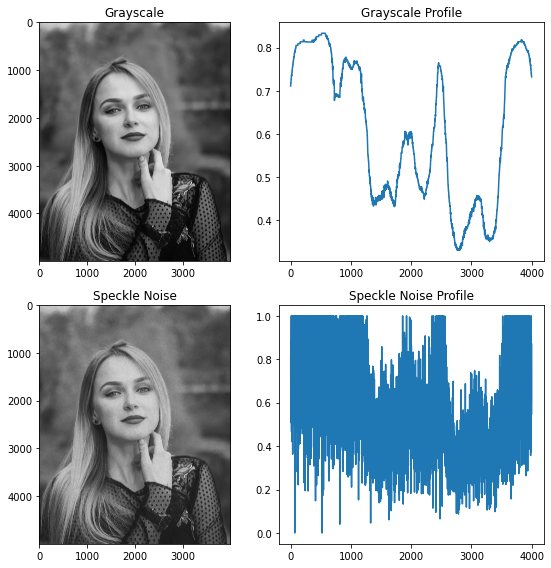

In [22]:
speckle_noise = random_noise(grayscale_img, mode='speckle', var=0.1)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.gray()
ax = axes.ravel()


ax[0].imshow(grayscale_img)   
ax[0].set_title("Grayscale")

ax[1].plot(grayscale_img[0,:])
ax[1].set_title("Grayscale Profile")

ax[2].imshow(speckle_noise)   
ax[2].set_title("Speckle Noise")

ax[3].plot(speckle_noise[0,:])
ax[3].set_title("Speckle Noise Profile")

fig.tight_layout()
plt.show()

## *Image Restoration*


*   Median Filter
*   Non-local Means denoising
*   Adaptive Filter
*   LWiener Filter




---

Importing Libraries and functions

---



In [23]:
from skimage.filters import median, threshold_local
from skimage.restoration import denoise_nl_means, estimate_sigma, wiener

### Using Median filter

---

Median Filter result

---

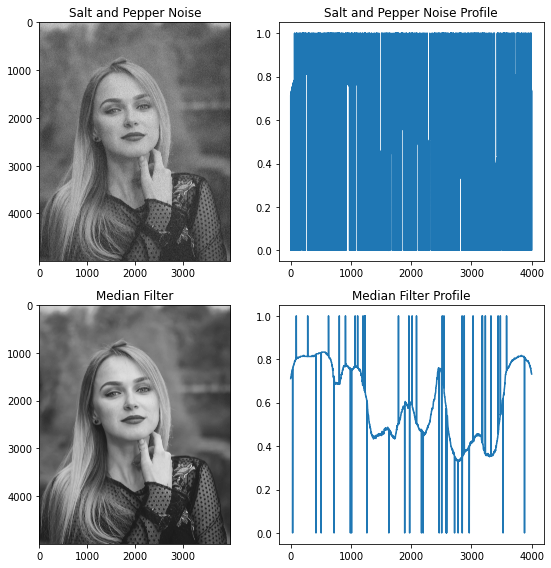

In [24]:
median_filter = median(salt_and_pepper_noise)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.gray()
ax = axes.ravel()

ax[0].imshow(salt_and_pepper_noise)   
ax[0].set_title("Salt and Pepper Noise")

ax[1].plot(salt_and_pepper_noise[0,:])
ax[1].set_title("Salt and Pepper Noise Profile")

ax[2].imshow(median_filter)   
ax[2].set_title("Median Filter")

ax[3].plot(median_filter[0,:])
ax[3].set_title("Median Filter Profile")

fig.tight_layout()
plt.show()

### Using Non-local Means Denoising

---

Non-local Means result

---

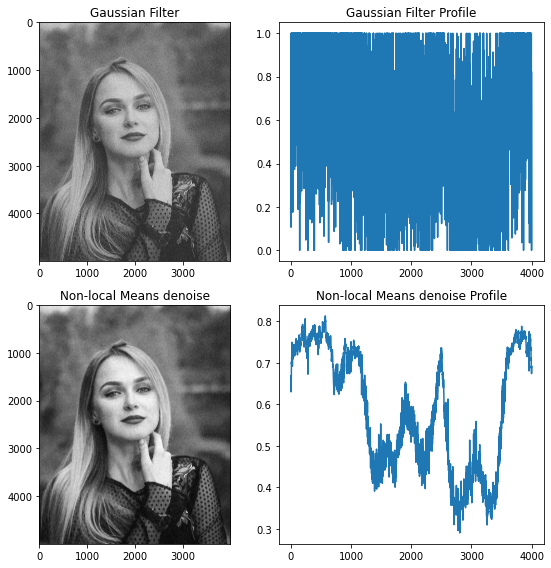

In [40]:
sigma_est = np.mean(estimate_sigma(gaussian_fltr, multichannel=True))

non_local_means_denoise = denoise_nl_means(gaussian_fltr, h=0.6 * sigma_est, sigma=sigma_est, fast_mode=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.gray()
ax = axes.ravel()

ax[0].imshow(gaussian_fltr)   
ax[0].set_title("Gaussian Filter")

ax[1].plot(gaussian_fltr[0,:])
ax[1].set_title("Gaussian Filter Profile")

ax[2].imshow(non_local_means_denoise)   
ax[2].set_title("Non-local Means denoise")

ax[3].plot(non_local_means_denoise[0,:])
ax[3].set_title("Non-local Means denoise Profile")

fig.tight_layout()
plt.show()

### Using Adaptive Filter

---

Adaptive Filter result

---

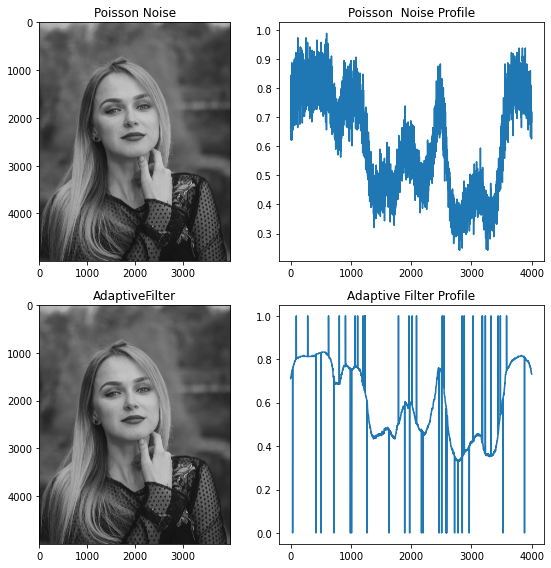

In [26]:
adaptive = threshold_local(expected_poisson_noise, block_size=1)
# adaptive = threshold_local(speckle_noise, block_size=1)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.gray()
ax = axes.ravel()

ax[0].imshow(expected_poisson_noise)   
ax[0].set_title("Poisson Noise")

ax[1].plot(expected_poisson_noise[0,:])
ax[1].set_title("Poisson  Noise Profile")

# ax[0].imshow(speckle_noise)   
# ax[0].set_title("Speckle Noise")

# ax[1].plot(speckle_noise[0,:])
# ax[1].set_title("Speckle Noise Profile")

ax[2].imshow(adaptive)   
ax[2].set_title("AdaptiveFilter")

ax[3].plot(median_filter[0,:])
ax[3].set_title("Adaptive Filter Profile")

fig.tight_layout()
plt.show()

### Using Wiener Filter



---

Wiener Filter result

---

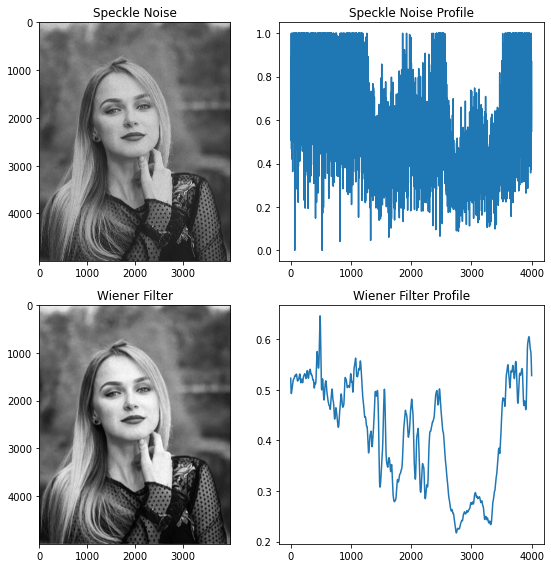

In [29]:
# img_as_np = np.asarray(guassain_fltr)
psf = np.ones((5,5)) / 25
wiener_fltr = wiener(speckle_noise, psf, 1100)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.gray()
ax = axes.ravel()

ax[0].imshow(speckle_noise)   
ax[0].set_title("Speckle Noise")

ax[1].plot(speckle_noise[0,:])
ax[1].set_title("Speckle Noise Profile")

ax[2].imshow(wiener_fltr)   
ax[2].set_title("Wiener Filter")

ax[3].plot(wiener_fltr[0,:])
ax[3].set_title("Wiener Filter Profile")

fig.tight_layout()
plt.show()

## *Result and Comparison*

---

Comparison of all filters' result

---

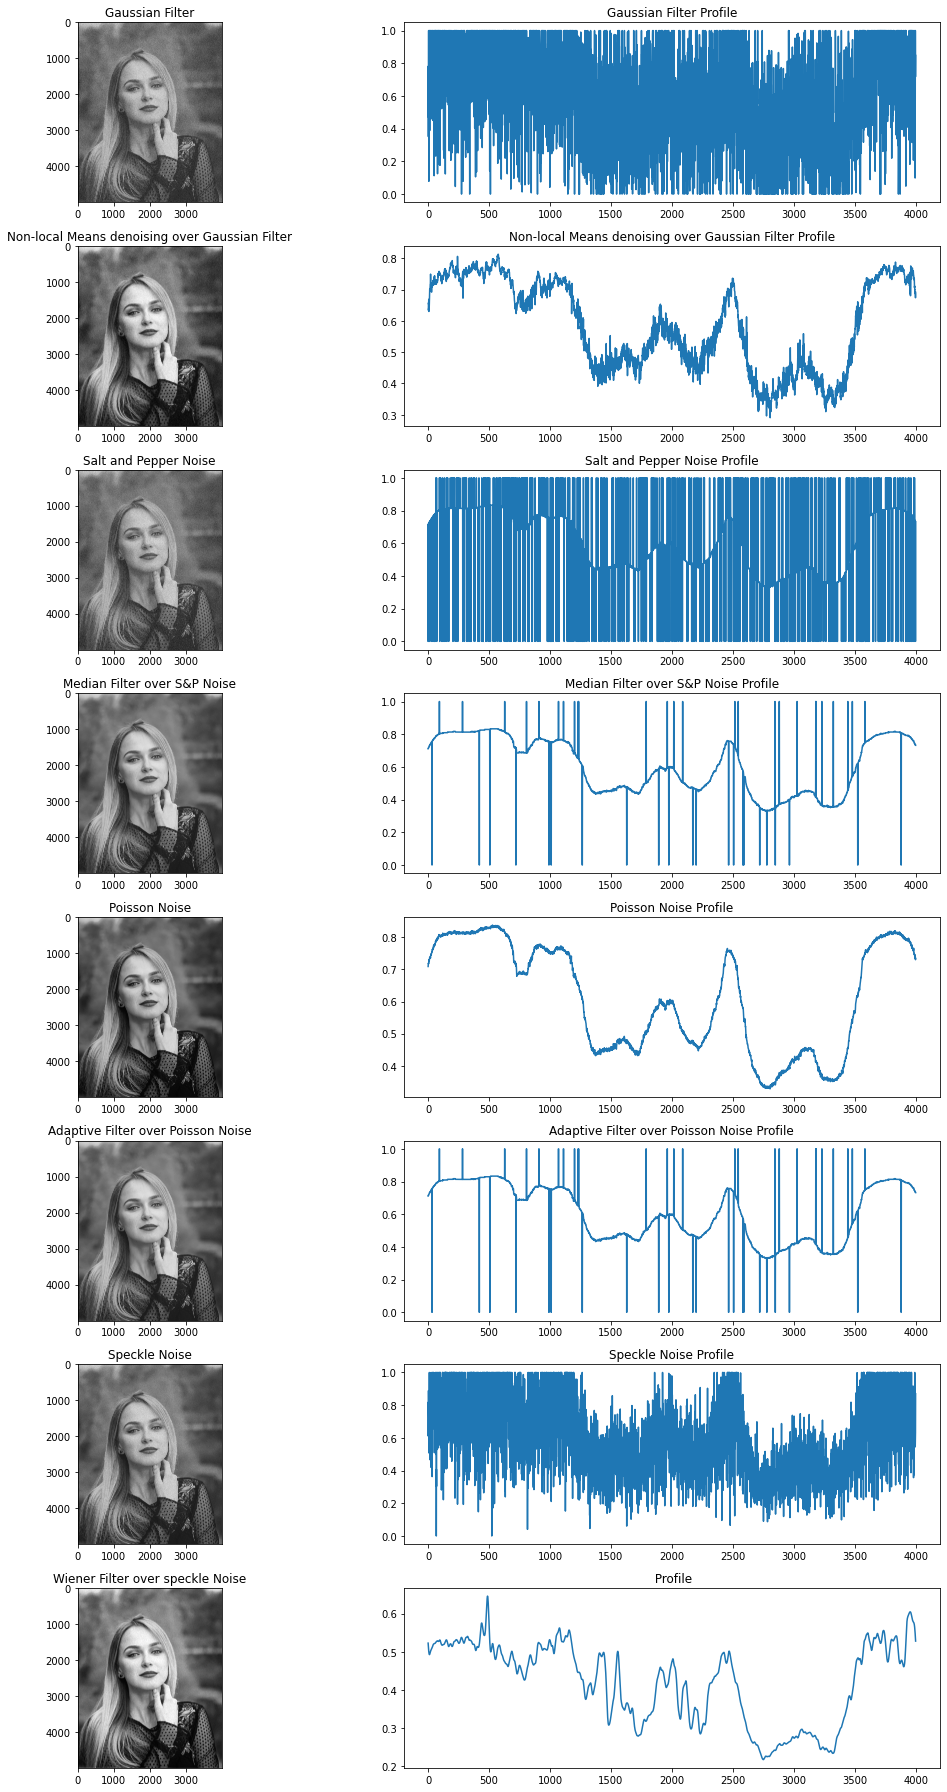

In [74]:
list_of_filters  = [(gaussian_fltr,"Gaussian Filter"),
                    (gaussian_fltr[0,:],"Gaussian Filter Profile"),
                    (non_local_means_denoise,"Non-local Means denoising over Gaussian Filter"),
                    (non_local_means_denoise[0,:],"Non-local Means denoising over Gaussian Filter Profile"),
                    (salt_and_pepper_noise, "Salt and Pepper Noise"),
                    (salt_and_pepper_noise[0,:],"Salt and Pepper Noise Profile"),
                    (median_filter,"Median Filter over S&P Noise"),
                    (median_filter[0,:],"Median Filter over S&P Noise Profile"),
                    (poisson_noise, "Poisson Noise"),
                    (poisson_noise[0,:],"Poisson Noise Profile"),
                    (median_filter,"Adaptive Filter over Poisson Noise"),
                    (median_filter[0,:],"Adaptive Filter over Poisson Noise Profile"),
                    (speckle_noise, "Speckle Noise"),
                    (speckle_noise[0,:],"Speckle Noise Profile"),
                    (wiener_fltr,"Wiener Filter over speckle Noise"),
                    (wiener_fltr[0,:]," Profile")] 

fig, axes = plt.subplots(8, 2, figsize=(15, 25))
plt.gray()
ax = axes.ravel()

count = 0
for i,ax in zip(list_of_filters, axes.ravel()):
  count+=1
  ax.plot(i[0]) and ax.set_title(i[1]) if (count % 2) == 0 else ax.imshow(i[0]) and ax.set_title(i[1])


fig.tight_layout()
plt.show()